In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc


In [2]:
df=pd.read_csv('Online Education.csv')

In [3]:
df.columns

Index(['Timestamp', 'Name', 'Education Qualification',
       'Which device do you use for online learning?',
       'Which app do you use for online lectures?',
       'Do you have a proper internet connection?',
       'How much time on an average do you spend on online lectures?',
       'Are you able to have proper audio/video during lectures?',
       'Are you satisfied with the technology and software that you use?',
       'Do you have proper communication with your teachers during online learning?',
       'Do you mind asking questions when you have any doubt/problem?',
       'How often do you have 1-1 discussion with your teachers?',
       'Do you understand the concepts during online lectures?',
       'Are you comfortable spending several hours on laptop/smartphone?',
       'What activity do you prefer during your free time?',
       'Rate your level of satisfaction of the online lecture ',
       'How helpful was the class material provided to you?',
       'Rate your ov

In [4]:
df.rename(columns={'Which device do you use for online learning?':'learning_Device',
                   'Which app do you use for online lectures?':'learning_app',
                   'Do you have a proper internet connection?':'internet_connection',
                   'How much time on an average do you spend on online lectures?':'lecture_spend_time',
                  'Are you able to have proper audio/video during lectures?':'av_lecture',
                  'Are you satisfied with the technology and software that you use?':'satisfied_techsoft',
                  'Do you have proper communication with your teachers during online learning?':'teacher_communication',
                  'Do you mind asking questions when you have any doubt/problem?':'ques_ask',
                  'How often do you have 1-1 discussion with your teachers?':'discussion',
                  'Do you understand the concepts during online lectures?':'concept',
                  'Are you comfortable spending several hours on laptop/smartphone?':'spend_hr',
                  'What activity do you prefer during your free time?':'free_activity',
                  'Rate your level of satisfaction of the online lecture ':'rating',
                  'How helpful was the class material provided to you?':'class_material',
                  'Rate your overall online learning experience from 1-5, 5 being the best':'overall_experience',
                  'Do you face any health issue due to online learning? ':'health_problem',
                  'Any suggestions you want to give to improve the online learning?':'suggestions'},inplace = True)

In [5]:
df.shape

(507, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                507 non-null    object
 1   Name                     506 non-null    object
 2   Education Qualification  507 non-null    object
 3   learning_Device          507 non-null    object
 4   learning_app             507 non-null    object
 5   internet_connection      507 non-null    object
 6   lecture_spend_time       507 non-null    object
 7   av_lecture               506 non-null    object
 8   satisfied_techsoft       507 non-null    object
 9   teacher_communication    507 non-null    object
 10  ques_ask                 506 non-null    object
 11  discussion               507 non-null    object
 12  concept                  507 non-null    object
 13  spend_hr                 507 non-null    object
 14  free_activity            507 non-null    o

In [7]:
df.head()

,Timestamp,Name,Education Qualification,learning_Device,learning_app,internet_connection,lecture_spend_time,av_lecture,satisfied_techsoft,teacher_communication,...,discussion,concept,spend_hr,free_activity,rating,class_material,overall_experience,health_problem,suggestions,Unnamed: 20
0,2021/03/07 7:27:13 PM GMT+5:30,NaN,Post-Graduation,Smartphone,Microsoft teams,Yes,3-5 hours,NaN,No,Yes,...,Sometimes,Sometimes,Yes,Yes,Satisfied,Somewhat helpful,4,No,NaN,A
1,2021/03/07 9:53:26 PM GMT+5:30,Geeta,Higher secondary (11-12th),Laptop,Google Meet,Yes,3-5 hours,Yes,Yes,Yes,...,Sometimes,Sometimes,No,Yes,Satisfied,Somewhat helpful,4,No,NaN,NaN
2,2021/03/07 10:00:49 PM GMT+5:30,Swati,Graduation/Diploma,Laptop,Google Meet,Yes,5-7 hours,Sometimes,No,Yes,...,Sometimes,Sometimes,No,Yes,Satisfied,Very helpful,4,No,NaN,NaN
3,2021/03/07 10:12:39 PM GMT+5:30,Tanu,Secondary,Desktop,Zoom,Yes,3-5 hours,Sometimes,No,Yes,...,Sometimes,Sometimes,No,Play Games,Neutral,Somewhat helpful,3,No,NaN,NaN
4,2021/03/08 5:25:58 PM GMT+5:30,Manasvi Sharma,Post-Graduation,Desktop,Microsoft teams,Yes,3-5 hours,Yes,Yes,No,...,Never,Yes,Yes,All of the above,Satisfied,Very helpful,4,No,Increase interaction more with students and fa...,NaN


In [8]:
df.tail()

,Timestamp,Name,Education Qualification,learning_Device,learning_app,internet_connection,lecture_spend_time,av_lecture,satisfied_techsoft,teacher_communication,...,discussion,concept,spend_hr,free_activity,rating,class_material,overall_experience,health_problem,suggestions,Unnamed: 20
502,2021/05/08 6:30:26 PM GMT+5:30,sunita paikrao,Higher secondary (11-12th),Smartphone,Zoom,Yes,5-7 hours,Sometimes,No,No,...,Sometimes,No,Yes,Play Games,Dissatisfied,Somewhat helpful,2,No,Give break in lectures,NaN
503,2021/05/08 6:31:31 PM GMT+5:30,komal dutane,Higher secondary (11-12th),Desktop,Google Meet,Yes,5-7 hours,Sometimes,Yes,No,...,Never,No,Yes,"Watch movies, songs etc.",Satisfied,Somewhat helpful,3,No,take test often,NaN
504,2021/05/08 6:46:06 PM GMT+5:30,murgan panchal,Graduation/Diploma,Smartphone,Zoom,Yes,1-3 hours,Sometimes,No,No,...,Sometimes,Yes,No,Complete any other courses,Neutral,Somewhat helpful,2,No,More break needed,NaN
505,2021/05/08 6:46:54 PM GMT+5:30,rahul tevar,Higher secondary (11-12th),Smartphone,Zoom,Yes,5-7 hours,Sometimes,Yes,No,...,Sometimes,No,No,Play Games,Neutral,Very helpful,3,No,NaN,NaN
506,2021/05/08 6:47:44 PM GMT+5:30,chitra gode,Higher secondary (11-12th),Desktop,Zoom,Yes,5-7 hours,No,Yes,No,...,Sometimes,No,Yes,"Watch movies, songs etc.",Neutral,Somewhat helpful,4,No,NaN,NaN


In [9]:
df.isnull()

,Timestamp,Name,Education Qualification,learning_Device,learning_app,internet_connection,lecture_spend_time,av_lecture,satisfied_techsoft,teacher_communication,...,discussion,concept,spend_hr,free_activity,rating,class_material,overall_experience,health_problem,suggestions,Unnamed: 20
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [10]:
df.isnull().sum()

Timestamp                    0
Name                         1
Education Qualification      0
learning_Device              0
learning_app                 0
internet_connection          0
lecture_spend_time           0
av_lecture                   1
satisfied_techsoft           0
teacher_communication        0
ques_ask                     1
discussion                   0
concept                      0
spend_hr                     0
free_activity                0
rating                       0
class_material               0
overall_experience           0
health_problem               0
suggestions                309
Unnamed: 20                506
dtype: int64

In [11]:
df['av_lecture'] = df['av_lecture'].fillna(0)
df['ques_ask'] = df['ques_ask'].fillna(0)

In [12]:
df.isnull().sum()

Timestamp                    0
Name                         1
Education Qualification      0
learning_Device              0
learning_app                 0
internet_connection          0
lecture_spend_time           0
av_lecture                   0
satisfied_techsoft           0
teacher_communication        0
ques_ask                     0
discussion                   0
concept                      0
spend_hr                     0
free_activity                0
rating                       0
class_material               0
overall_experience           0
health_problem               0
suggestions                309
Unnamed: 20                506
dtype: int64

In [13]:
df['Education Qualification'].value_counts()

Higher secondary (11-12th)    277
Graduation/Diploma            181
Post-Graduation                31
Secondary                      14
PhD and other                   4
Name: Education Qualification, dtype: int64

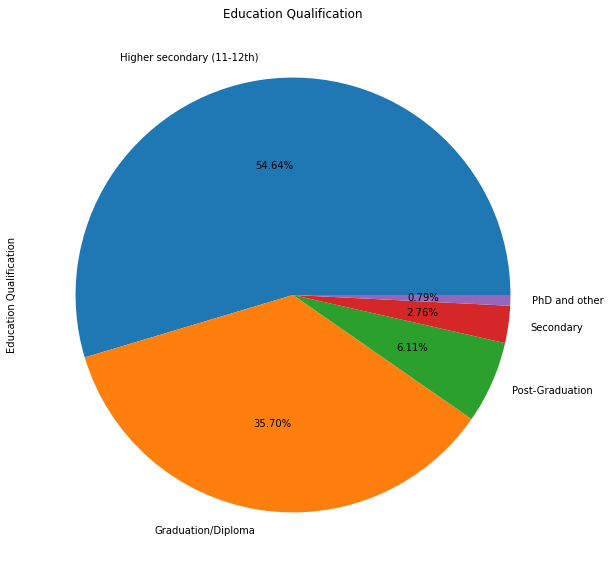

In [14]:
#sns.countplot(x='Education Qualification',data=df)
#plt.title("Education Qualification")
#plt.show()

df['Education Qualification'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(12,10))
plt.title("Education Qualification")
plt.show()

In [15]:
df['learning_Device'].value_counts()

Smartphone    359
Desktop       128
Laptop         16
Tablet          4
Name: learning_Device, dtype: int64

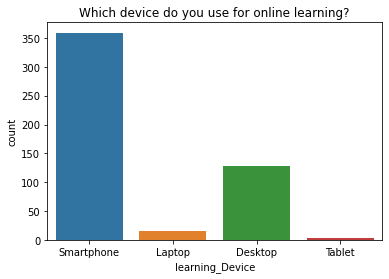

In [18]:
sns.countplot(x='learning_Device',data=df)
plt.title("Which device do you use for online learning?")
plt.show()

In [19]:
df['learning_app'].value_counts()

Zoom               274
Google Meet        211
Microsoft teams     21
What's app           1
Name: learning_app, dtype: int64

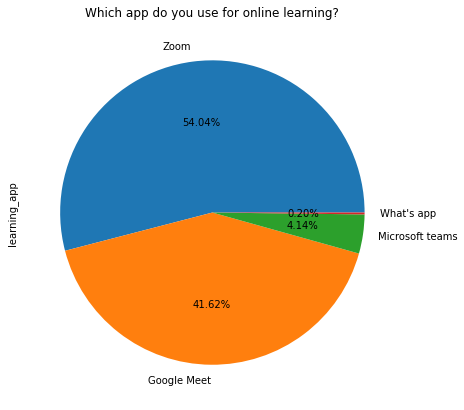

In [29]:
df['learning_app'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(9,7))
plt.title("Which app do you use for online learning?")
plt.show()

In [30]:
df['internet_connection'].value_counts()

Yes    489
No      18
Name: internet_connection, dtype: int64

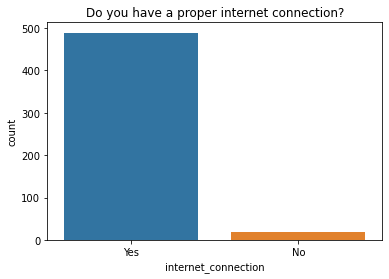

In [31]:
sns.countplot(x='internet_connection',data=df)
plt.title("Do you have a proper internet connection?")
plt.show()

In [32]:
df['lecture_spend_time'].value_counts()

5-7 hours            177
3-5 hours            164
1-3 hours            163
More than 7 hours      3
Name: lecture_spend_time, dtype: int64

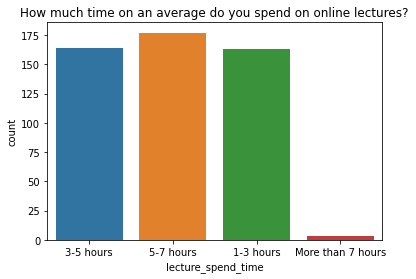

In [33]:
sns.countplot(x='lecture_spend_time',data=df)
plt.title("How much time on an average do you spend on online lectures?")
plt.show()

In [34]:
df['av_lecture'].value_counts()

Sometimes    363
No            98
Yes           45
0              1
Name: av_lecture, dtype: int64

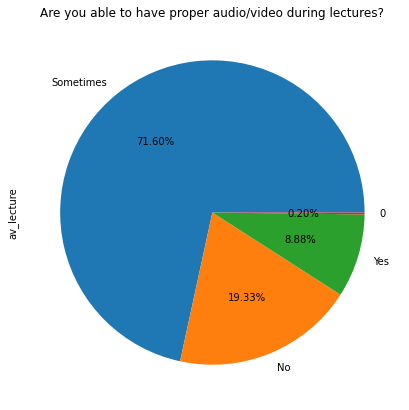

In [35]:
df['av_lecture'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(9,7))
plt.title("Are you able to have proper audio/video during lectures?")
plt.show()

In [36]:
df['satisfied_techsoft'].value_counts()

Yes    264
No     243
Name: satisfied_techsoft, dtype: int64

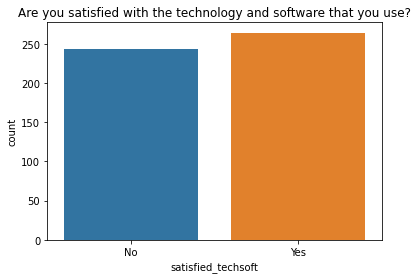

In [37]:
sns.countplot(x='satisfied_techsoft',data=df)
plt.title("Are you satisfied with the technology and software that you use?")
plt.show()

In [38]:
df['teacher_communication'].value_counts()

No     444
Yes     63
Name: teacher_communication, dtype: int64

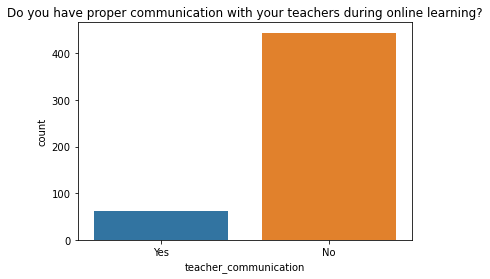

In [39]:
sns.countplot(x='teacher_communication',data=df)
plt.title("Do you have proper communication with your teachers during online learning?")
plt.show()

In [40]:
df['ques_ask'].value_counts()

Yes    472
No      34
0        1
Name: ques_ask, dtype: int64

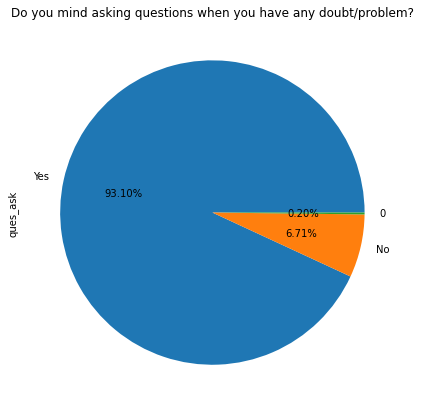

In [41]:
df['ques_ask'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(9,7))
plt.title("Do you mind asking questions when you have any doubt/problem?")
plt.show()

In [42]:
df['discussion'].value_counts()

Sometimes     390
Never         103
Very often     14
Name: discussion, dtype: int64

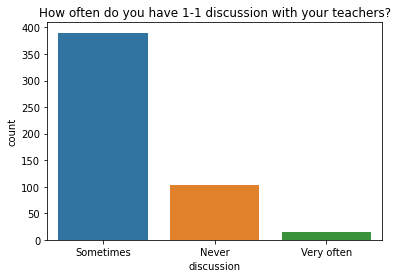

In [43]:
sns.countplot(x='discussion',data=df)
plt.title("How often do you have 1-1 discussion with your teachers?")
plt.show()

In [44]:
df['concept'].value_counts()

No           212
Sometimes    182
Yes          113
Name: concept, dtype: int64

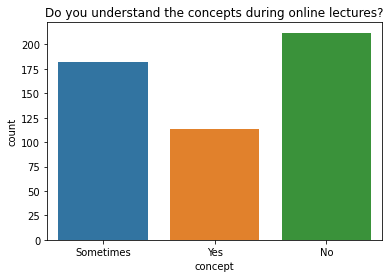

In [45]:
sns.countplot(x='concept',data=df)
plt.title("Do you understand the concepts during online lectures?")
plt.show()

In [46]:
df['spend_hr'].value_counts()

Yes    295
No     212
Name: spend_hr, dtype: int64

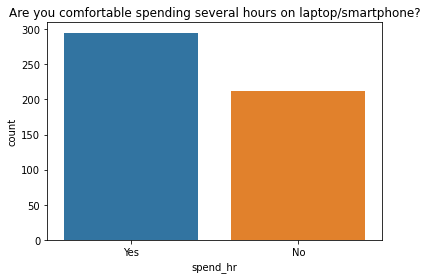

In [47]:
sns.countplot(x='spend_hr',data=df)
plt.title("Are you comfortable spending several hours on laptop/smartphone?")
plt.show()

In [48]:
df['free_activity'].value_counts()

Watch movies, songs etc.                      256
Complete any other courses                    123
Play Games                                    116
Yes                                             3
Sleep                                           2
All of the above                                1
Play Sports                                     1
I love to dance and sketching and painting      1
Playing cricket                                 1
Social media                                    1
Read books                                      1
.                                               1
Name: free_activity, dtype: int64

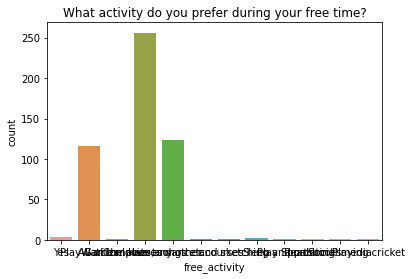

In [49]:
sns.countplot(x='free_activity',data=df)
plt.title("What activity do you prefer during your free time?")
plt.show()

In [50]:
df['rating'].value_counts()

Neutral           250
Satisfied         202
Dissatisfied       53
Very Satisfied      2
Name: rating, dtype: int64

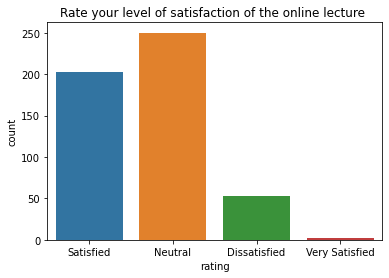

In [51]:
sns.countplot(x='rating',data=df)
plt.title("Rate your level of satisfaction of the online lecture ")
plt.show()



In [52]:
df['class_material'].value_counts()

Somewhat helpful      381
Very helpful           72
Not at all helpful     48
Extremely helpful       6
Name: class_material, dtype: int64

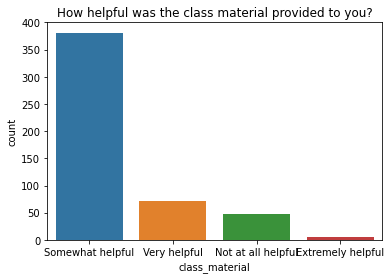

In [53]:
sns.countplot(x='class_material',data=df)
plt.title("How helpful was the class material provided to you?")
plt.show()

In [54]:
df['overall_experience'].value_counts()

3    269
4    149
2     80
5      5
1      4
Name: overall_experience, dtype: int64

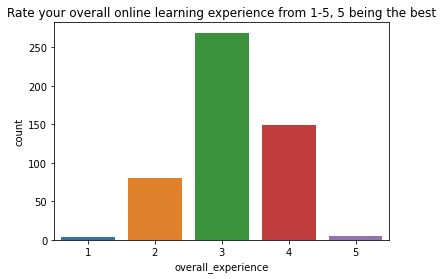

In [55]:
sns.countplot(x='overall_experience',data=df)
plt.title("Rate your overall online learning experience from 1-5, 5 being the best")
plt.show()

In [56]:
df['health_problem'].value_counts()

No     475
Yes     32
Name: health_problem, dtype: int64

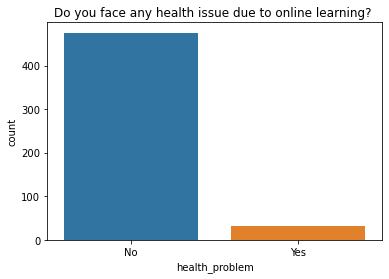

In [57]:
sns.countplot(x='health_problem',data=df)
plt.title("Do you face any health issue due to online learning? ")
plt.show()

In [58]:
def num_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [59]:
df['internet_connection'] = df['internet_connection'].apply(num_con)
df['satisfied_techsoft'] = df['satisfied_techsoft'].apply(num_con)
df['teacher_communication'] = df['teacher_communication'].apply(num_con)
df['spend_hr'] = df['spend_hr'].apply(num_con)
df['health_problem'] = df['health_problem'].apply(num_con)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                507 non-null    object
 1   Name                     506 non-null    object
 2   Education Qualification  507 non-null    object
 3   learning_Device          507 non-null    object
 4   learning_app             507 non-null    object
 5   internet_connection      507 non-null    int64 
 6   lecture_spend_time       507 non-null    object
 7   av_lecture               507 non-null    object
 8   satisfied_techsoft       507 non-null    int64 
 9   teacher_communication    507 non-null    int64 
 10  ques_ask                 507 non-null    object
 11  discussion               507 non-null    object
 12  concept                  507 non-null    object
 13  spend_hr                 507 non-null    int64 
 14  free_activity            507 non-null    o

In [61]:
df.drop(['Timestamp'], axis = 1,inplace=True)
df.drop(['Name'], axis = 1,inplace=True)

In [62]:
df

,Education Qualification,learning_Device,learning_app,internet_connection,lecture_spend_time,av_lecture,satisfied_techsoft,teacher_communication,ques_ask,discussion,concept,spend_hr,free_activity,rating,class_material,overall_experience,health_problem,suggestions,Unnamed: 20
0,Post-Graduation,Smartphone,Microsoft teams,1,3-5 hours,0,0,1,0,Sometimes,Sometimes,1,Yes,Satisfied,Somewhat helpful,4,0,NaN,A
1,Higher secondary (11-12th),Laptop,Google Meet,1,3-5 hours,Yes,1,1,No,Sometimes,Sometimes,0,Yes,Satisfied,Somewhat helpful,4,0,NaN,NaN
2,Graduation/Diploma,Laptop,Google Meet,1,5-7 hours,Sometimes,0,1,Yes,Sometimes,Sometimes,0,Yes,Satisfied,Very helpful,4,0,NaN,NaN
3,Secondary,Desktop,Zoom,1,3-5 hours,Sometimes,0,1,No,Sometimes,Sometimes,0,Play Games,Neutral,Somewhat helpful,3,0,NaN,NaN
4,Post-Graduation,Desktop,Microsoft teams,1,3-5 hours,Yes,1,0,Yes,Never,Yes,1,All of the above,Satisfied,Very helpful,4,0,Increase interaction more with students and fa...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Higher secondary (11-12th),Smartphone,Zoom,1,5-7 hours,Sometimes,0,0,Yes,Sometimes,No,1,Play Games,Dissatisfied,Somewhat helpful,2,0,Give break in lectures,NaN
503,Higher secondary (11-12th),Desktop,Google Meet,1,5-7 hours,Sometimes,1,0,Yes,Never,No,1,"Watch movies, songs etc.",Satisfied,Somewhat helpful,3,0,take test often,NaN
504,Graduation/Diploma,Smartphone,Zoom,1,1-3 hours,Sometimes,0,0,Yes,Sometimes,Yes,0,Complete any other courses,Neutral,Somewhat helpful,2,0,More break needed,NaN
505,Higher secondary (11-12th),Smartphone,Zoom,1,5-7 hours,Sometimes,1,0,Yes,Sometimes,No,0,Play Games,Neutral,Very helpful,3,0,NaN,NaN


In [63]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [64]:
df['Education Qualification'] = number.fit_transform(df['Education Qualification'].astype('str'))

In [65]:
df

,Education Qualification,learning_Device,learning_app,internet_connection,lecture_spend_time,av_lecture,satisfied_techsoft,teacher_communication,ques_ask,discussion,concept,spend_hr,free_activity,rating,class_material,overall_experience,health_problem,suggestions,Unnamed: 20
0,3,Smartphone,Microsoft teams,1,3-5 hours,0,0,1,0,Sometimes,Sometimes,1,Yes,Satisfied,Somewhat helpful,4,0,NaN,A
1,1,Laptop,Google Meet,1,3-5 hours,Yes,1,1,No,Sometimes,Sometimes,0,Yes,Satisfied,Somewhat helpful,4,0,NaN,NaN
2,0,Laptop,Google Meet,1,5-7 hours,Sometimes,0,1,Yes,Sometimes,Sometimes,0,Yes,Satisfied,Very helpful,4,0,NaN,NaN
3,4,Desktop,Zoom,1,3-5 hours,Sometimes,0,1,No,Sometimes,Sometimes,0,Play Games,Neutral,Somewhat helpful,3,0,NaN,NaN
4,3,Desktop,Microsoft teams,1,3-5 hours,Yes,1,0,Yes,Never,Yes,1,All of the above,Satisfied,Very helpful,4,0,Increase interaction more with students and fa...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,Smartphone,Zoom,1,5-7 hours,Sometimes,0,0,Yes,Sometimes,No,1,Play Games,Dissatisfied,Somewhat helpful,2,0,Give break in lectures,NaN
503,1,Desktop,Google Meet,1,5-7 hours,Sometimes,1,0,Yes,Never,No,1,"Watch movies, songs etc.",Satisfied,Somewhat helpful,3,0,take test often,NaN
504,0,Smartphone,Zoom,1,1-3 hours,Sometimes,0,0,Yes,Sometimes,Yes,0,Complete any other courses,Neutral,Somewhat helpful,2,0,More break needed,NaN
505,1,Smartphone,Zoom,1,5-7 hours,Sometimes,1,0,Yes,Sometimes,No,0,Play Games,Neutral,Very helpful,3,0,NaN,NaN


In [66]:
one_hot_data = pd.get_dummies(df[['learning_Device','learning_app','lecture_spend_time','av_lecture',
                                  
                                  'ques_ask','discussion','concept','spend_hr','free_activity','rating','class_material','satisfied_techsoft',
                                  'Education Qualification','internet_connection','teacher_communication']])

In [67]:
one_hot_data

,spend_hr,satisfied_techsoft,Education Qualification,internet_connection,teacher_communication,learning_Device_Desktop,learning_Device_Laptop,learning_Device_Smartphone,learning_Device_Tablet,learning_app_Google Meet,...,"free_activity_Watch movies, songs etc.",free_activity_Yes,rating_Dissatisfied,rating_Neutral,rating_Satisfied,rating_Very Satisfied,class_material_Extremely helpful,class_material_Not at all helpful,class_material_Somewhat helpful,class_material_Very helpful
0,1,0,3,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,1,1,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,0,4,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
503,1,1,1,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
504,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
505,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [68]:
one_hot_data.columns

Index(['spend_hr', 'satisfied_techsoft', 'Education Qualification',
       'internet_connection', 'teacher_communication',
       'learning_Device_Desktop', 'learning_Device_Laptop',
       'learning_Device_Smartphone', 'learning_Device_Tablet',
       'learning_app_Google Meet', 'learning_app_Microsoft teams',
       'learning_app_What's app', 'learning_app_Zoom',
       'lecture_spend_time_1-3 hours', 'lecture_spend_time_3-5 hours',
       'lecture_spend_time_5-7 hours', 'lecture_spend_time_More than 7 hours',
       'av_lecture_0', 'av_lecture_No', 'av_lecture_Sometimes',
       'av_lecture_Yes', 'ques_ask_0', 'ques_ask_No', 'ques_ask_Yes',
       'discussion_Never', 'discussion_Sometimes', 'discussion_Very often',
       'concept_No', 'concept_Sometimes', 'concept_Yes', 'free_activity_.',
       'free_activity_All of the above',
       'free_activity_Complete any other courses',
       'free_activity_I love to dance and sketching and painting',
       'free_activity_Play Games', 'f

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Education Qualification  507 non-null    int32 
 1   learning_Device          507 non-null    object
 2   learning_app             507 non-null    object
 3   internet_connection      507 non-null    int64 
 4   lecture_spend_time       507 non-null    object
 5   av_lecture               507 non-null    object
 6   satisfied_techsoft       507 non-null    int64 
 7   teacher_communication    507 non-null    int64 
 8   ques_ask                 507 non-null    object
 9   discussion               507 non-null    object
 10  concept                  507 non-null    object
 11  spend_hr                 507 non-null    int64 
 12  free_activity            507 non-null    object
 13  rating                   507 non-null    object
 14  class_material           507 non-null    o

Prediction based on target variable as 'Technology Satisfication'

Plotting a variables graphs

<ipython-input-70-36cd853d1fc3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-70-36cd853d1fc3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-70-36cd853d1fc3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

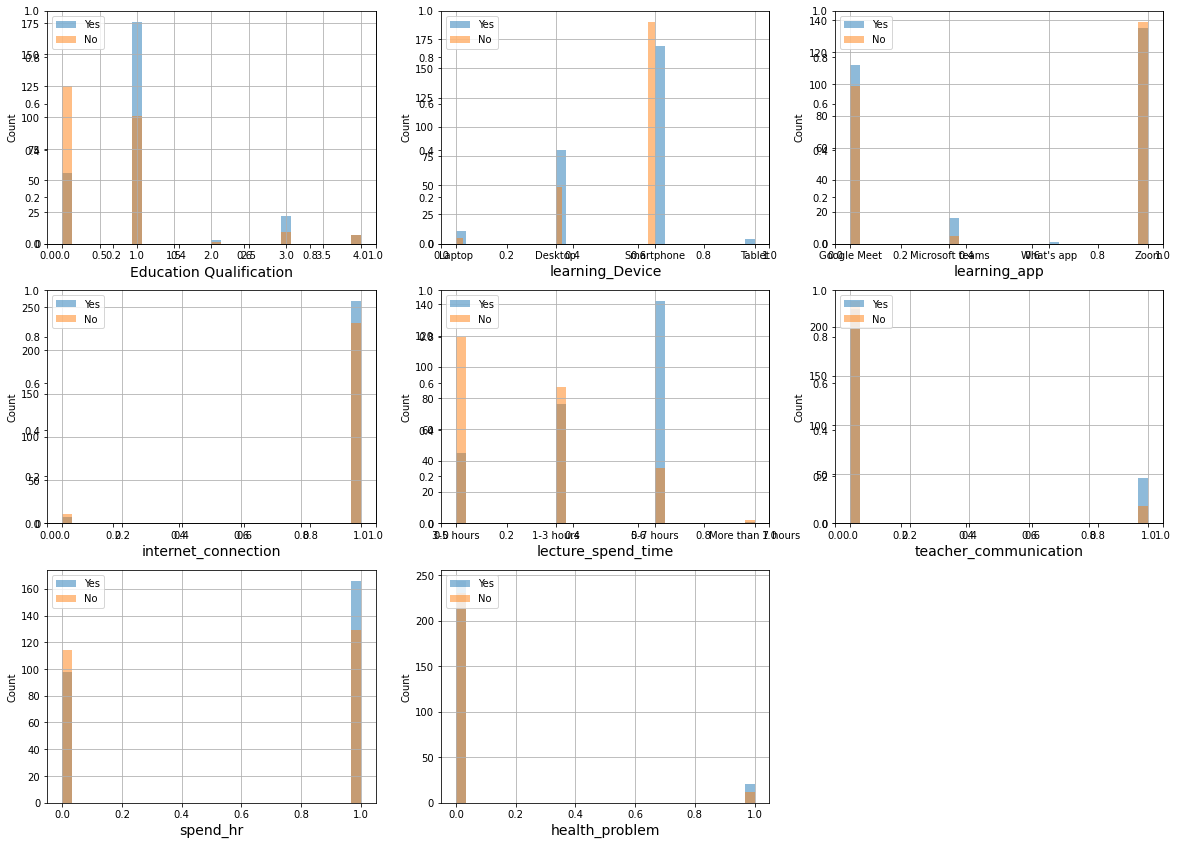

In [70]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(df.columns, axes.flatten()))):
    features = ['Education Qualification','internet_connection', 'learning_Device', 'learning_app','lecture_spend_time',
       'spend_hr','health_problem','teacher_communication','lecture_spend_time']
    if colName in features:
        
        pos = df[df['satisfied_techsoft'] == 1][colName]
        neg = df[df['satisfied_techsoft'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=14)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='No')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

#Decision Tree

In [71]:
train, test = train_test_split(one_hot_data, test_size =0.25)

In [72]:
train.shape

(380, 50)

In [73]:
test.shape

(127, 50)

In [74]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [75]:
features = ['Education Qualification','internet_connection',
       'spend_hr','teacher_communication']

In [76]:
X_train = train[features]
y_train = train['satisfied_techsoft']

X_test = test[features]
y_test = test['satisfied_techsoft']

In [77]:
tree1 = c1.fit(X_train, y_train)

In [78]:
y_pred_t1 = c1.predict(X_train)

In [79]:
y_pred1 = c1.predict(X_test)

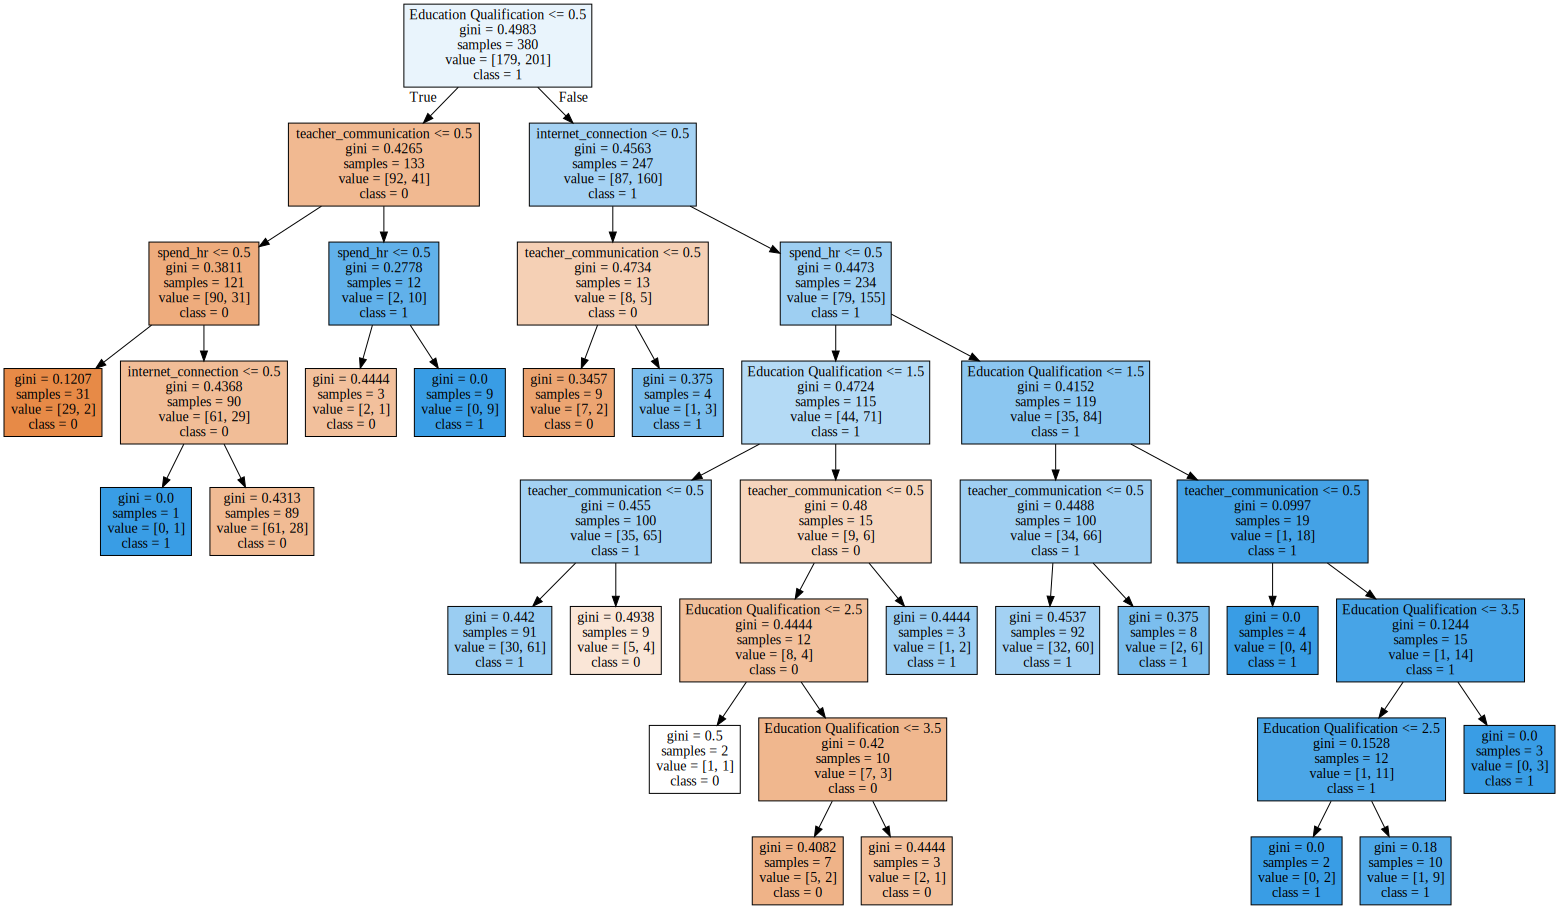

In [80]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [81]:
edu_train_score = accuracy_score(y_train, y_pred_t1)*100

In [82]:
edu_test_score = accuracy_score(y_test, y_pred1)*100
edu_test_score

66.14173228346458

In [83]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        64
           1       0.63      0.76      0.69        63

    accuracy                           0.66       127
   macro avg       0.67      0.66      0.66       127
weighted avg       0.67      0.66      0.66       127



In [84]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[36, 28],
       [15, 48]], dtype=int64)

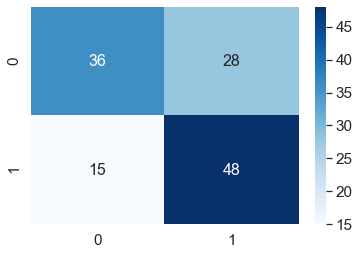

In [85]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [86]:
model1 = tree1.predict_proba(X_train)
model1

array([[0.32967033, 0.67032967],
       [0.68539326, 0.31460674],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.5       , 0.5       ],
       [0.25      , 0.75      ],
       [0.34782609, 0.65217391],
       [0.        , 1.        ],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.32967033, 0.67032967],
       [0.34782609, 0.65217391],
       [0.1       , 0.9       ],
       [0.34782609, 0.65217391],
       [0.93548387, 0.06451613],
       [0.32967033, 0.67032967],
       [0.68539326, 0.31460674],
       [0.32967033, 0.67032967],
       [0.32967033, 0.67032967],
       [0.93548387, 0.06451613],
       [0.34782609, 0.65217391],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.77777778, 0.22222222],
       [0.32967033, 0.67032967],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.32967033, 0.67032967],
       [0.32967033, 0.67032967],
       [0.68539326, 0.31460674],
       [0.

In [87]:
model1_test = tree1.predict_proba(X_test)
model1_test

array([[0.68539326, 0.31460674],
       [0.68539326, 0.31460674],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.33333333, 0.66666667],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.32967033, 0.67032967],
       [0.32967033, 0.67032967],
       [0.55555556, 0.44444444],
       [0.68539326, 0.31460674],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.        , 1.        ],
       [0.34782609, 0.65217391],
       [0.32967033, 0.67032967],
       [0.34782609, 0.65217391],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.32967033, 0.67032967],
       [0.32967033, 0.67032967],
       [0.93548387, 0.06451613],
       [0.32967033, 0.67032967],
       [0.        , 1.        ],
       [0.68539326, 0.31460674],
       [0.34782609, 0.65217391],
       [0.25      , 0.75      ],
       [0.93548387, 0.06451613],
       [0.32967033, 0.67032967],
       [0.68539326, 0.31460674],
       [0.

<Figure size 504x504 with 0 Axes>

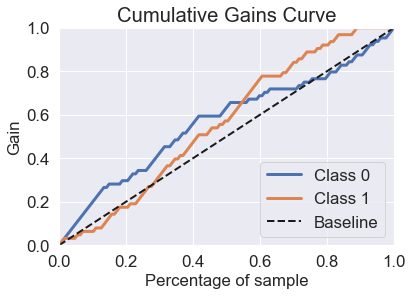

In [88]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model1_test)
plt.show()

#2 Random Forest

In [89]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [90]:
edu_rf_model_pred = rf1.predict(X_test)

In [91]:
edu_test_score_rf = accuracy_score(y_test, edu_rf_model_pred)*100
edu_test_score_rf

65.35433070866141

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        64
           1       0.62      0.78      0.69        63

    accuracy                           0.65       127
   macro avg       0.66      0.65      0.65       127
weighted avg       0.66      0.65      0.65       127



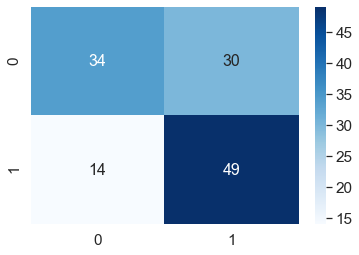

In [92]:
print(classification_report(y_test, edu_rf_model_pred))
rf_cm = confusion_matrix(y_test, edu_rf_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#3Support Vector Machine

In [93]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [94]:
model_svm = svmf.fit(X_train, y_train)

In [95]:
pred_svm = model_svm.predict(X_test)

In [96]:
edu_test_score_svm = accuracy_score(y_test, pred_svm)*100
edu_test_score_svm

66.92913385826772

#Plot accuracy graph of three Algorithm

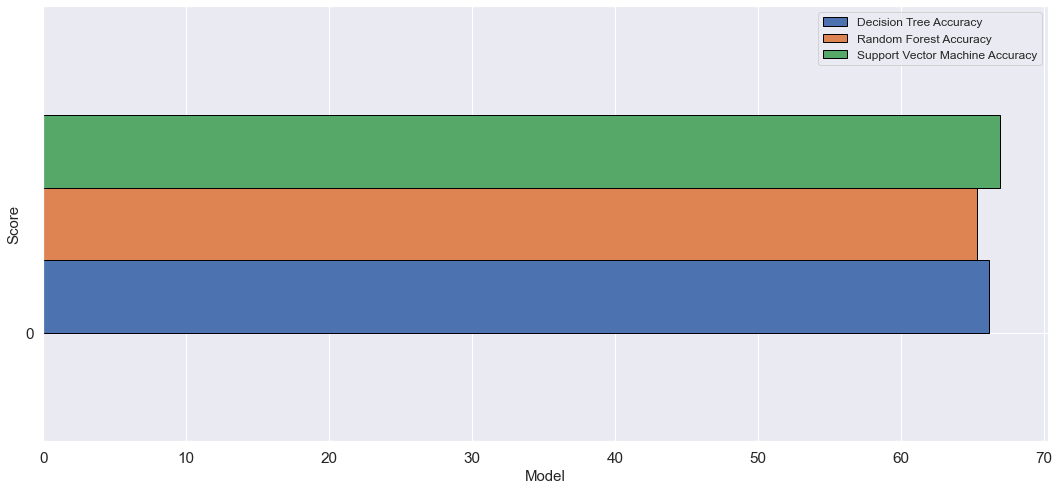

In [97]:
model_accuracy = pd.DataFrame({"Decision Tree Accuracy ": [edu_test_score],
                        "Random Forest Accuracy": [edu_test_score_rf],
                        "Support Vector Machine Accuracy": [edu_test_score_svm]})
model_accuracy.plot.barh(align='edge',figsize=(18,8),ec="black");
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.legend(fontsize=12);